# Pothole Classification

## Load Packages

In [1]:
#pip install simple_image_download

In [2]:
#pip install opencv-python

In [38]:
pip install lime

     |████████████████████████████████| 275 kB 3.2 MB/s eta 0:00:01
     |████████████████████████████████| 12.8 MB 14.9 MB/s eta 0:00:01
     |████████████████████████████████| 4.3 MB 7.1 MB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 6.4 MB/s eta 0:00:01
     |████████████████████████████████| 169 kB 6.9 MB/s eta 0:00:01
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283845 sha256=16bc40c0cb8004ced494a98684ad726795bc2a2235d76a90b4e44dc3d18a662c
  Stored in directory: /Users/naty/Library/Caches/pip/wheels/e6/a6/20/cc1e293fcdb67ede666fed293cb895395e7ecceb4467779546
Successfully built lime
Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
from simple_image_download import simple_image_download as simp
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.optimizers import Adam


from tensorflow.keras import datasets, layers, models
import pickle


In [4]:
# response = simp.simple_image_download

# response().download('pothole', 3000)

# print(response().urls('pothole', 3000))

## Adjust images

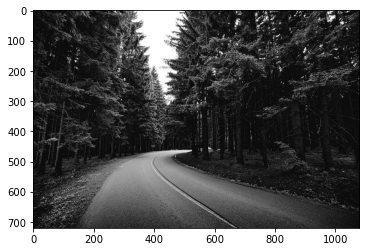

In [5]:
DATASET_LOCATION = "/Users/naty/pothole/Pothole-Detector/Image Data/POTHOLE_DATA"
Categories = ['Not potholes', 'Potholes'] #Not potholes = 0, Potholes = 1

for category in Categories:  
    path = os.path.join(DATASET_LOCATION,category)  
    for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE) #Locates both folders
        plt.imshow(img_array, cmap='gray') #plot array with matpot lib and display w/ openCV

        break  
    break

In [6]:
print(img_array) #Verify array values

[[13 15 16 ...  6 19 31]
 [10 14 18 ... 25 41 52]
 [12 17 22 ... 45 51 53]
 ...
 [11 11 11 ... 13 13 13]
 [13 13 13 ... 13 13 13]
 [13 13 12 ... 13 13 13]]


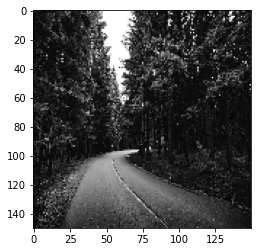

In [7]:
IMG_SIZE = 150 #adjust image size

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

##  Load in data

In [8]:
DATASET_LOCATION = "/Users/naty/pothole/Pothole-Detector/Image Data/POTHOLE_DATA"
Categories = ['Not potholes', 'Potholes'] #Not potholes = 0, Potholes = 1
IMG_SIZE = 150
training = []

def train_me():
    for category in Categories:  # do dogs and cats

        path = os.path.join(DATASET_LOCATION,category)  # create path to dogs and cats
        class_num = Categories.index(category)  # get the classification  (0 or a 1). 0=no pothole 1=pothole

        for img in (os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass

train_me()

print(len(training))

1037


/Users/naty/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

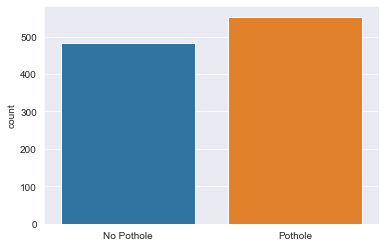

In [9]:
l = []
for i in training:
    if(i[1] == 0):
        l.append("No Pothole")
    else:
        l.append("Pothole")
        
        
sns.set_style('darkgrid')
sns.countplot(l)

In [10]:
random.shuffle(training)

In [11]:
for sample in training[:10]:
    print(sample[1])

1
1
1
0
1
1
1
0
1
1


In [12]:
X = []
y = []

for features,label in training:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)  #(how many features, size, size, 1 color array)
y = np.array(y)

In [13]:
print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1)) #Check me

[[[[ 65]
   [120]
   [168]
   ...
   [126]
   [155]
   [ 65]]

  [[140]
   [179]
   [174]
   ...
   [112]
   [168]
   [148]]

  [[119]
   [ 90]
   [176]
   ...
   [158]
   [142]
   [130]]

  ...

  [[109]
   [167]
   [169]
   ...
   [ 40]
   [ 58]
   [ 77]]

  [[163]
   [165]
   [183]
   ...
   [197]
   [202]
   [203]]

  [[144]
   [138]
   [160]
   ...
   [163]
   [174]
   [195]]]]


## First Simple Model

In [14]:
X = X/255.0 #Normalize data

model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=100, epochs=30, validation_split=0.25)

model.save('FIRST.model')

Epoch 1/30
8/8 [==============================] - 53s 7s/step - loss: 8.3274 - accuracy: 0.5032 - val_loss: 0.7749 - val_accuracy: 0.5154
Epoch 2/30
8/8 [==============================] - 49s 6s/step - loss: 0.6544 - accuracy: 0.6358 - val_loss: 0.5808 - val_accuracy: 0.7577
Epoch 3/30
8/8 [==============================] - 53s 7s/step - loss: 0.6045 - accuracy: 0.6847 - val_loss: 0.5156 - val_accuracy: 0.8115
Epoch 4/30
8/8 [==============================] - 50s 6s/step - loss: 0.4593 - accuracy: 0.8044 - val_loss: 0.4860 - val_accuracy: 0.7923
Epoch 5/30
8/8 [==============================] - 48s 6s/step - loss: 0.3767 - accuracy: 0.8366 - val_loss: 0.6120 - val_accuracy: 0.7269
Epoch 6/30
8/8 [==============================] - 49s 6s/step - loss: 0.3389 - accuracy: 0.8507 - val_loss: 0.3875 - val_accuracy: 0.8231
Epoch 7/30
8/8 [==============================] - 48s 6s/step - loss: 0.2599 - accuracy: 0.8906 - val_loss: 0.4331 - val_accuracy: 0.7885
Epoch 8/30
8/8 [==================

In [15]:
def prepare(filepath):
    IMG_SIZE = 150  # 50 in txt-based
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)  # read in the image, convert to grayscale
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize image to match model's expected sizing
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)  # return the image 

In [16]:
fsm = tf.keras.models.load_model("FIRST.model")

In [34]:
insert_image = '/Users/naty/pothole/Pothole-Detector/Image Data/Testing/Potholes/8.jpg'

In [35]:
prediction = fsm.predict([prepare(insert_image)])

In [36]:
prediction #Correct!

array([[1.]], dtype=float32)

In [20]:
#Confusion Matrix

In [21]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf

import numpy as np

import seaborn as sns

import pandas as pd

In [22]:
y_pred=fsm.predict((X))
con_mat = tf.math.confusion_matrix(labels=y, predictions=y_pred).numpy()

In [23]:
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = Categories, 
                     columns = [0, 1])

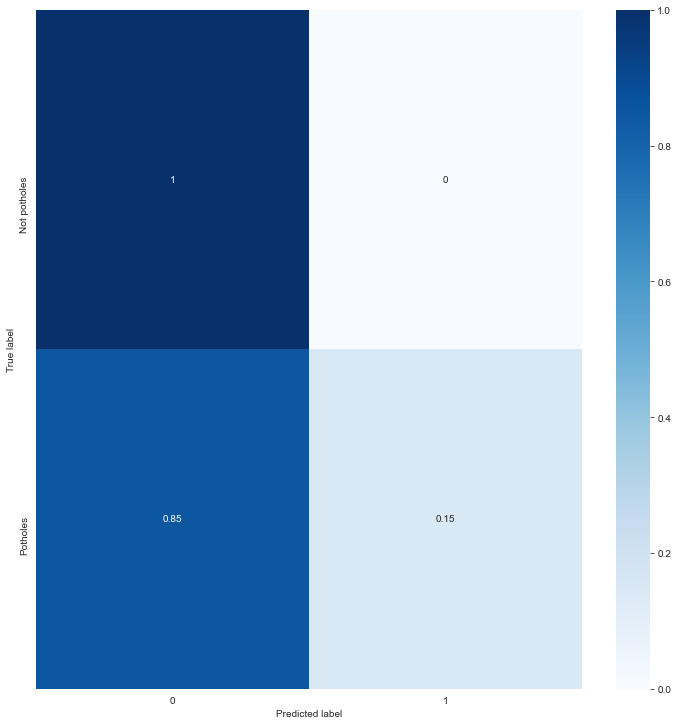

In [24]:
figure = plt.figure(figsize=(10, 10))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
#All scores (f1 score too!)

## Investigate the model using LIME

In [55]:
%load_ext autoreload
%autoreload 2
import os,sys
try:
    import lime
except:
    sys.path.append(os.path.join('..', '..')) # add the current directory
    import lime
from lime import lime_image

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
explainer = lime_image.LimeImageExplainer()

In [60]:
%%time
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(insert_image, model.predict, top_labels=2, hide_color=1, num_samples=1)

AttributeError: 'str' object has no attribute 'shape'

In [39]:
from skimage.segmentation import mark_boundaries

In [44]:
%load_ext autoreload
%autoreload 2
import os,sys
try:
    import lime
except:
    sys.path.append(os.path.join('..', '..')) # add the current directory
    import lime
from lime import lime_image

In [45]:
explainer = lime_image.LimeImageExplainer()

In [46]:
import os
import keras
from keras.applications import inception_v3 as inc_net
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [54]:
images = l

#%%time
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(images[0], model.predict, top_labels=5, hide_color=0, num_samples=1000)



AttributeError: 'str' object has no attribute 'shape'

In [47]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=2, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

NameError: name 'explanation' is not defined

NameError: name 'images' is not defined

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

In [61]:
import numpy as np
import keras
from keras.applications.imagenet_utils import decode_predictions
import skimage.io 
import skimage.segmentation
import copy
import sklearn
import sklearn.metrics
from sklearn.linear_model import LinearRegression
import warnings

In [62]:
warnings.filterwarnings('ignore') 
inceptionV3_model = tf.keras.models.load_model("FIRST.model") #Load pretrained model

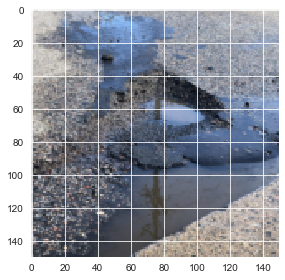

In [72]:
Xi = skimage.io.imread('/Users/naty/pothole/Pothole-Detector/Image Data/Testing/Potholes/1x.jpg')
Xi = skimage.transform.resize(Xi, (IMG_SIZE,IMG_SIZE)) 
Xi = (Xi - 0.5)*2 #Inception pre-processing
skimage.io.imshow(Xi/2+0.5) # Show image before inception preprocessing

In [75]:
np.random.seed(222)
preds = model.predict(Xi)
decode_predictions(preds)[0] #Top 5 classes

ValueError: in user code:

    /Users/naty/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1462 predict_function  *
        return step_function(self, iterator)
    /Users/naty/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/naty/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/naty/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/naty/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/naty/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1445 run_step  **
        outputs = model.predict_step(data)
    /Users/naty/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1418 predict_step
        return self(x, training=False)
    /Users/naty/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    /Users/naty/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:191 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: [None, 150, 3]


In [76]:
superpixels = skimage.segmentation.quickshift(Xi, kernel_size=4,max_dist=200, ratio=0.2)
num_superpixels = np.unique(superpixels).shape[0]
num_superpixels

17

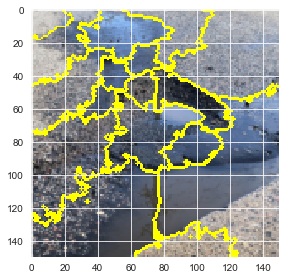

In [77]:
skimage.io.imshow(skimage.segmentation.mark_boundaries(Xi/2+0.5, superpixels))